<a href="https://colab.research.google.com/github/abdelkadergelany/AdminLTE/blob/master/Multi_algo_testing_iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets

In [ ]:
#Load dataset
iris = datasets.load_iris()

# Randoom Forest

In [ ]:
# print the label species(setosa, versicolor,virginica)
print(iris.target_names)

# print the names of the four features
print(iris.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
# Creating a DataFrame of given iris dataset.
import pandas as pd
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})


In [ ]:
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score,classification_report


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [ ]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.87      0.93      0.90        14
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



In [ ]:
feature_imp = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.440402
petal length (cm)    0.439079
sepal length (cm)    0.092637
sepal width (cm)     0.027882
dtype: float64

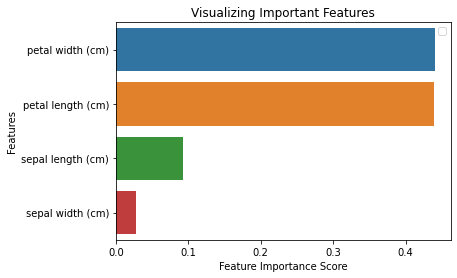

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()


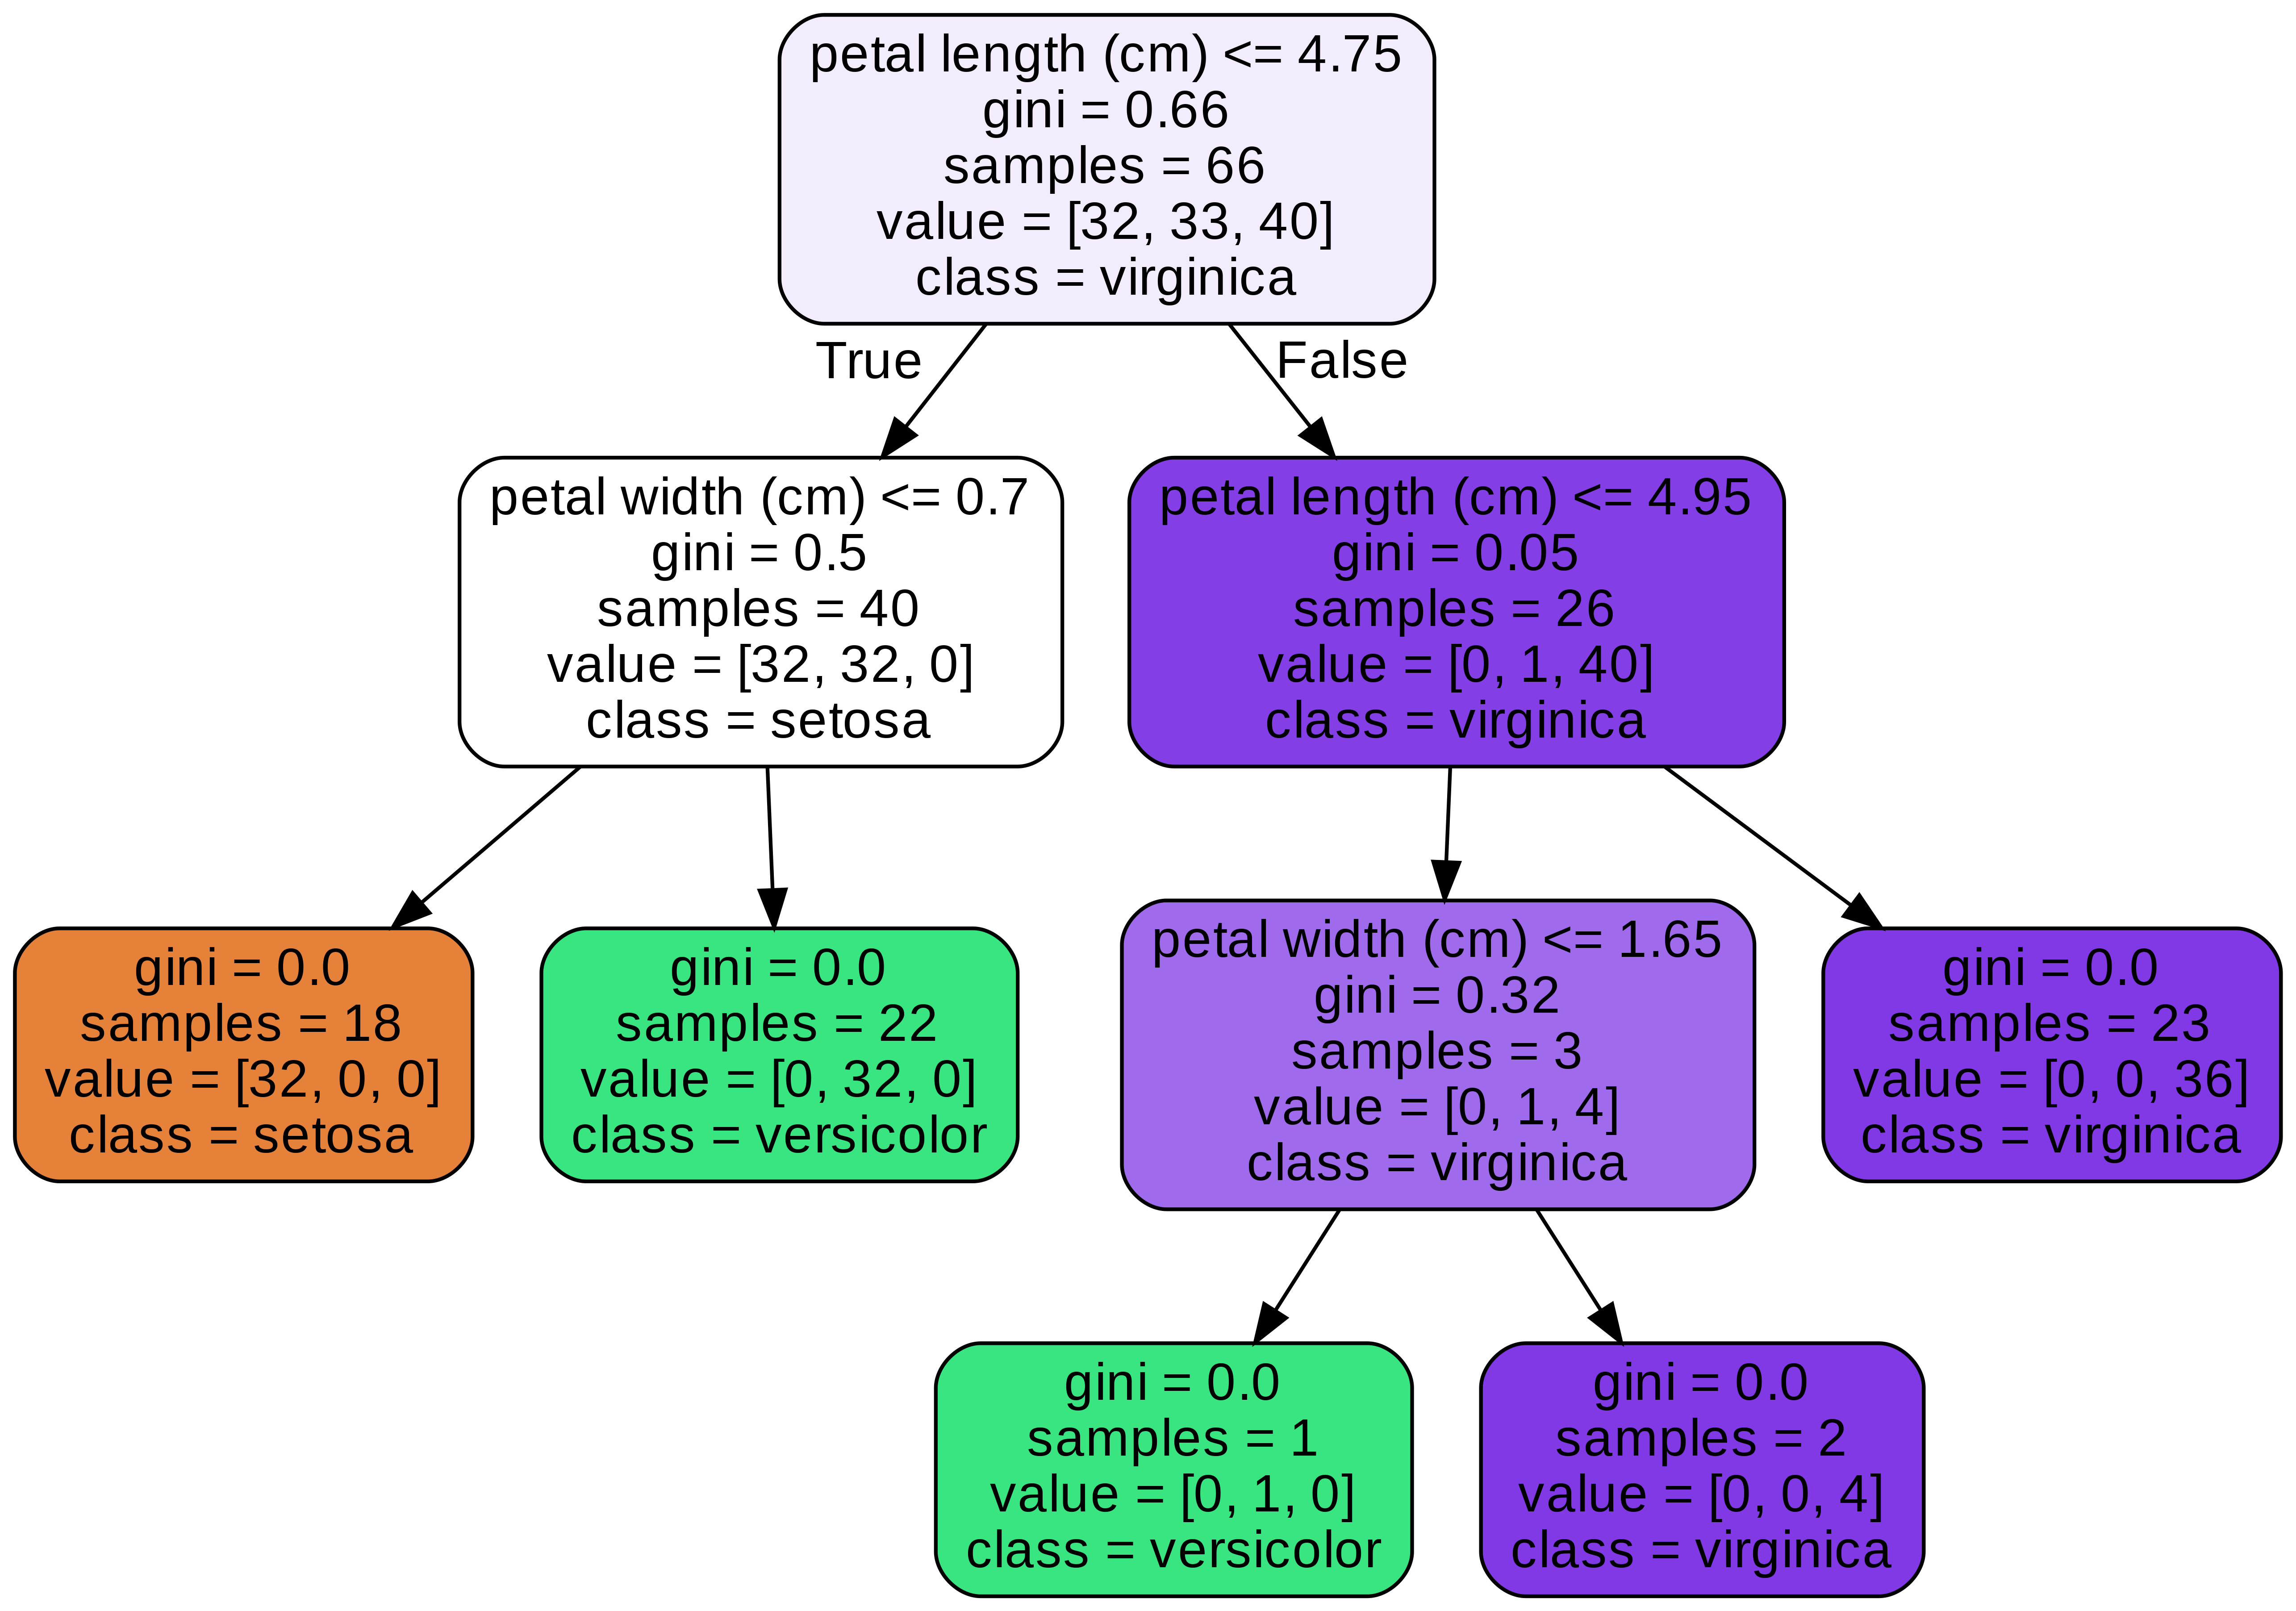

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file


estimator = clf.estimators_[5]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False,
                precision = 2, filled = True)

# Convert to png using system command 
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
X=data[['sepal length', 'sepal width', 'petal length', 'petal width']]  # Features
y=data['species']  # Labels

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [ ]:
#Create a Gaussian Classifier
clf=GradientBoostingClassifier(n_estimators=100)

#Train the model
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


In [ ]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.90      1.00      0.95         9
           2       1.00      0.95      0.97        20

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.97        45
weighted avg       0.98      0.98      0.98        45



# SVM

In [ ]:
from sklearn import svm

In [ ]:
model = svm.SVC(kernel='rbf', gamma=0.5, C=0.1)

In [ ]:
model.fit(X_train, y_train)

SVC(C=0.1, gamma=0.5)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9333333333333333


In [ ]:
print("Classification Report:",classification_report(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.75      1.00      0.86         9
           2       1.00      0.85      0.92        20

    accuracy                           0.93        45
   macro avg       0.92      0.95      0.93        45
weighted avg       0.95      0.93      0.94        45



# CNN

In [ ]:
from keras.models import Sequential
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from keras.layers import Dense


In [ ]:

x = iris.data
y_ = iris.target.reshape(-1, 1) # Convert data to a single column


In [ ]:

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)


# Split the data for training and testing
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20)

In [ ]:

# Build the model

model = Sequential()

model.add(Dense(10, input_shape=(4,), activation='relu', name='fc1'))
model.add(Dense(10, activation='relu', name='fc2'))
model.add(Dense(3, activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print('Neural Network Model Summary: ')
print(model.summary())


In [ ]:

# Train the model
model.fit(train_x, train_y, verbose=2, batch_size=5, epochs=200)

Epoch 1/200
24/24 - 1s - loss: 1.4514 - accuracy: 0.3583 - 504ms/epoch - 21ms/step
Epoch 2/200
24/24 - 0s - loss: 1.1069 - accuracy: 0.3750 - 39ms/epoch - 2ms/step
Epoch 3/200
24/24 - 0s - loss: 1.0246 - accuracy: 0.6000 - 36ms/epoch - 2ms/step
Epoch 4/200
24/24 - 0s - loss: 0.9863 - accuracy: 0.6250 - 40ms/epoch - 2ms/step
Epoch 5/200
24/24 - 0s - loss: 0.9603 - accuracy: 0.6083 - 35ms/epoch - 1ms/step
Epoch 6/200
24/24 - 0s - loss: 0.9332 - accuracy: 0.6417 - 42ms/epoch - 2ms/step
Epoch 7/200
24/24 - 0s - loss: 0.9085 - accuracy: 0.5083 - 37ms/epoch - 2ms/step
Epoch 8/200
24/24 - 0s - loss: 0.8635 - accuracy: 0.6417 - 39ms/epoch - 2ms/step
Epoch 9/200
24/24 - 0s - loss: 0.8292 - accuracy: 0.7417 - 51ms/epoch - 2ms/step
Epoch 10/200
24/24 - 0s - loss: 0.7958 - accuracy: 0.8000 - 39ms/epoch - 2ms/step
Epoch 11/200
24/24 - 0s - loss: 0.7576 - accuracy: 0.9167 - 39ms/epoch - 2ms/step
Epoch 12/200
24/24 - 0s - loss: 0.7190 - accuracy: 0.9333 - 42ms/epoch - 2ms/step
Epoch 13/200
24/24 - 0s

In [ ]:

# Test on unseen data

results = model.evaluate(test_x, test_y)


1/1 [==============================] - 0s 144ms/step - loss: 0.0132 - accuracy: 1.0000


In [ ]:

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Final test set loss: 0.013153
Final test set accuracy: 1.000000
